In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##################################
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
df = pd.read_csv('E:\\machine learning\\projects\\diamonds.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.head(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48  
6  3.98  2.47  
7  4.11  2.53  
8  3.78  2.49  
9  4.05  2.39

In [5]:
df = df.set_index('Unnamed: 0')

In [6]:
df.shape

(53940, 10)

In [7]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [8]:
#unique values in each column
dict_={}
for feature in df.columns:
    dict_[feature]=((df[feature].value_counts().shape[0]))
pd.DataFrame(dict_,index=['unique_counts']).transpose()

unique_counts
carat              273
cut                  5
color                7
clarity              8
depth              184
table              127
price            11602
x                  554
y                  552
z                  375

In [9]:
# percentage of missing values in each category
dict_={}
for feature in df.columns:
    dict_[feature]=((df[feature].isnull().sum())/len(df))*100
pd.DataFrame(dict_,index=['%age of missing value']).transpose()

%age of missing value
carat                      0.0
cut                        0.0
color                      0.0
clarity                    0.0
depth                      0.0
table                      0.0
price                      0.0
x                          0.0
y                          0.0
z                          0.0

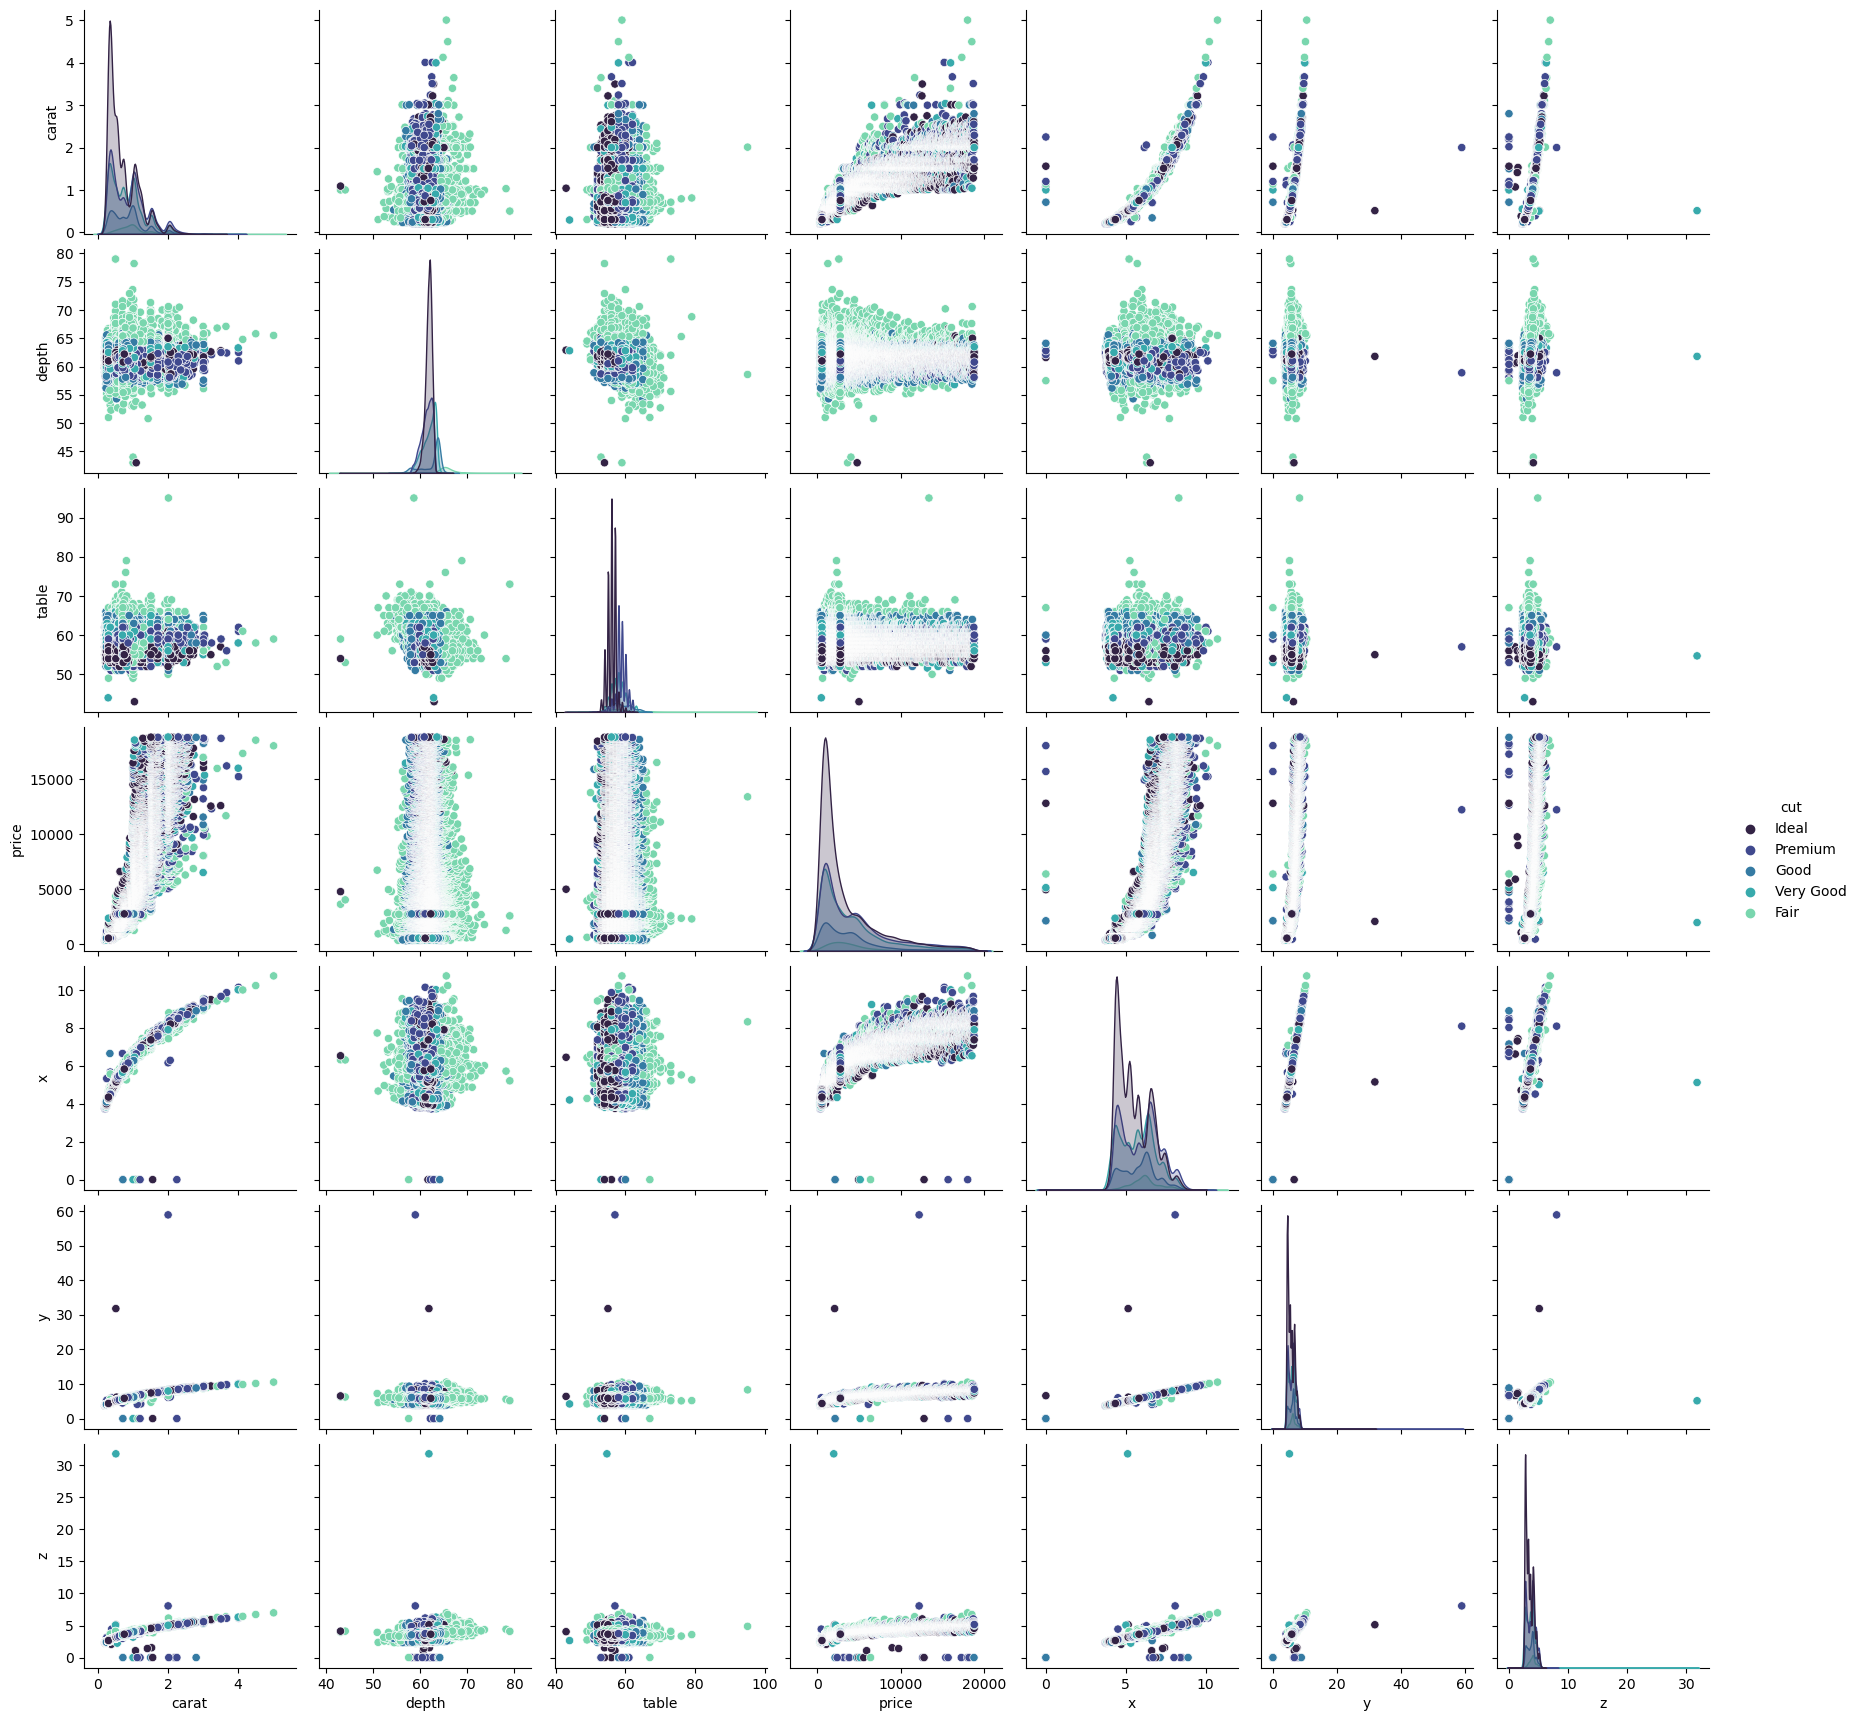

In [10]:
sns.pairplot(df, hue='cut', palette='mako')

C:\Users\Dear User\AppData\Local\Temp\ipykernel_1160\3452959234.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr= df.corr()
C:\Users\Dear User\AppData\Local\Temp\ipykernel_1160\3452959234.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dfCorr, dtype=np.bool))


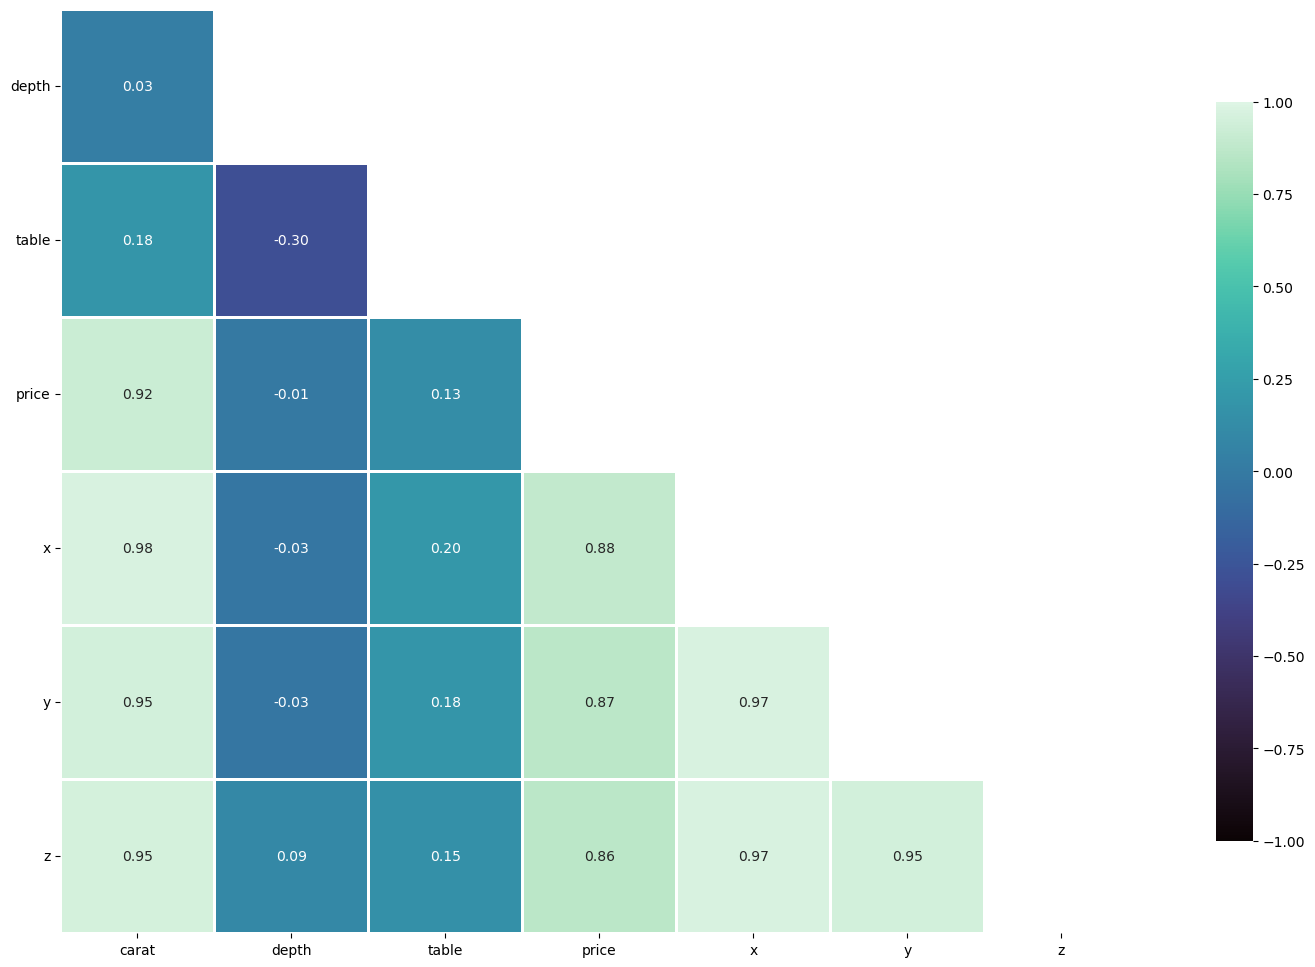

In [11]:
plt.figure(figsize=(20, 12))

dfCorr= df.corr()


mask = np.triu(np.ones_like(dfCorr, dtype=np.bool))
mask = mask[1:, :]


sns.heatmap(data=dfCorr.iloc[1:,:], vmin=-1, vmax=1, cbar_kws={"shrink": .8},annot=True, mask=mask,
            cmap='mako' ,square=True, linewidths=1, fmt=".2f")

plt.yticks(rotation=0)
plt.show()

E:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


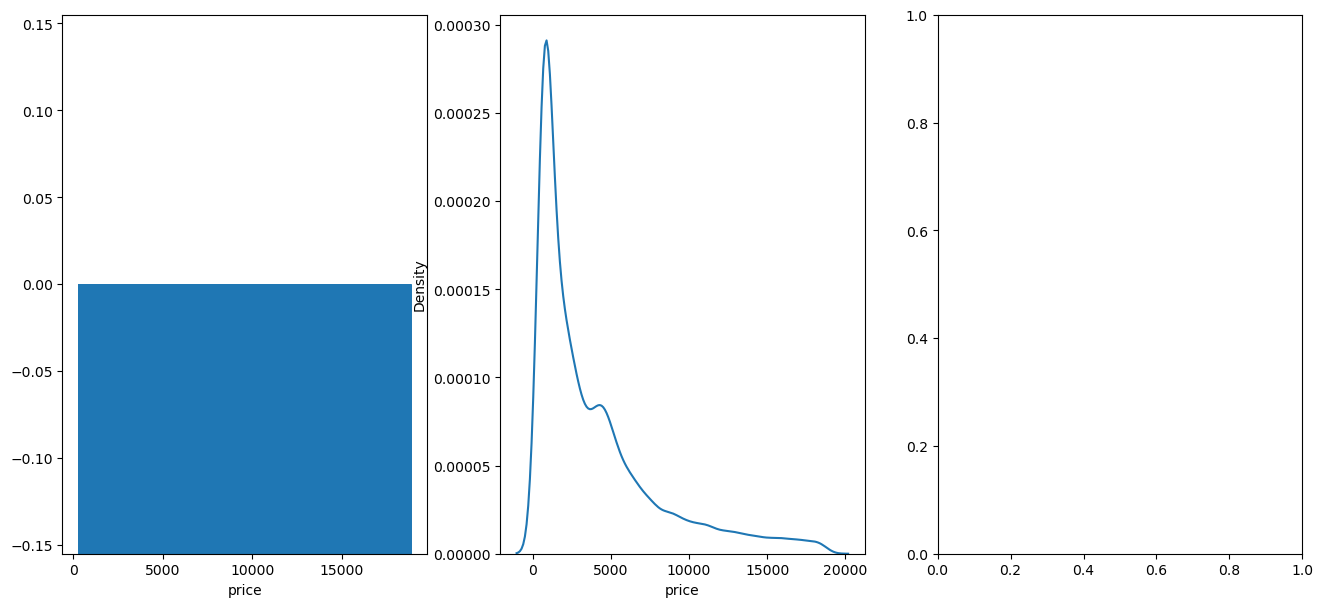

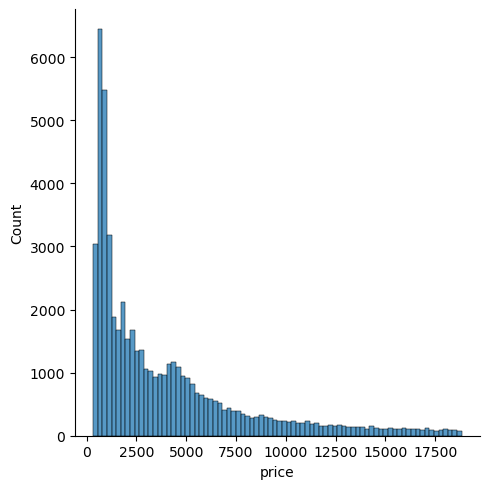

In [19]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="price", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="price")
sns.displot(ax = axes[2], data=df, x="price")

E:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


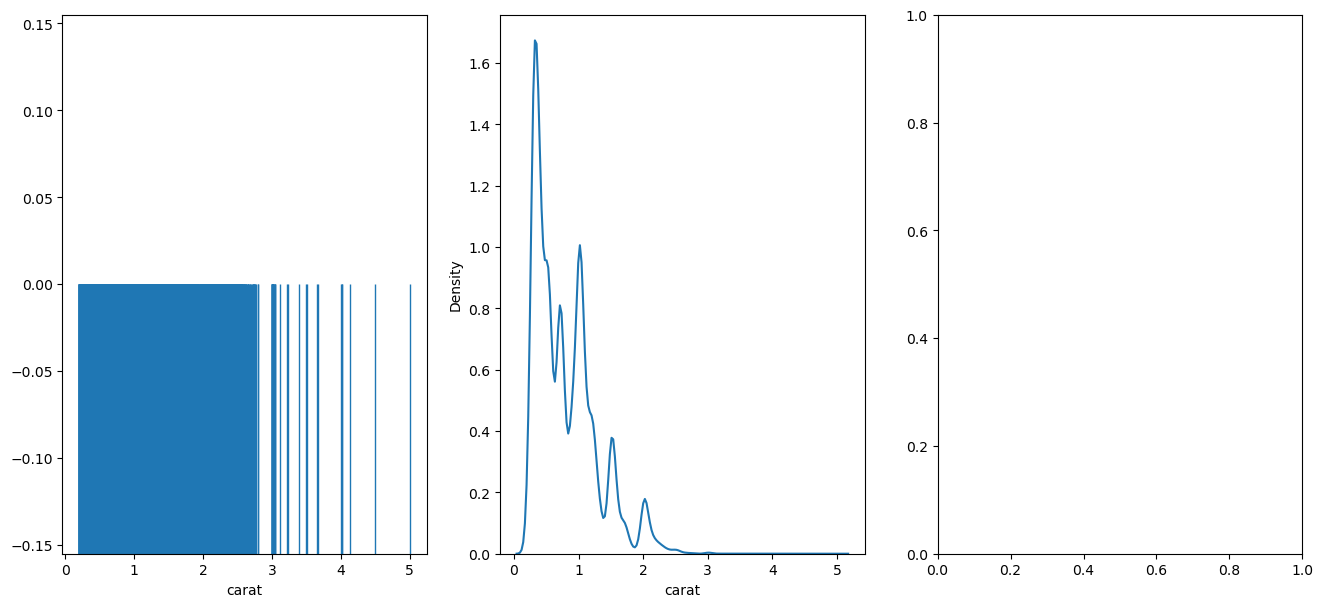

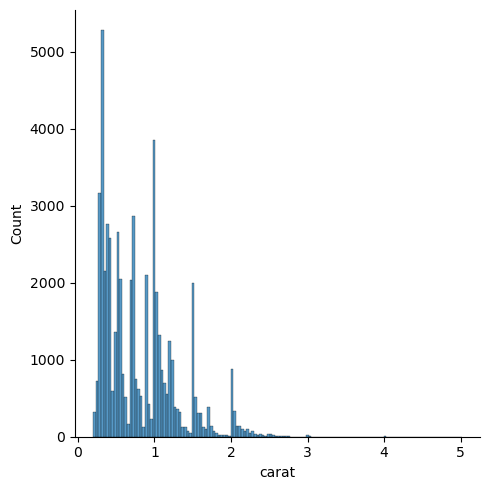

In [13]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="carat", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="carat")
sns.displot(ax = axes[2], data=df, x="carat")

E:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


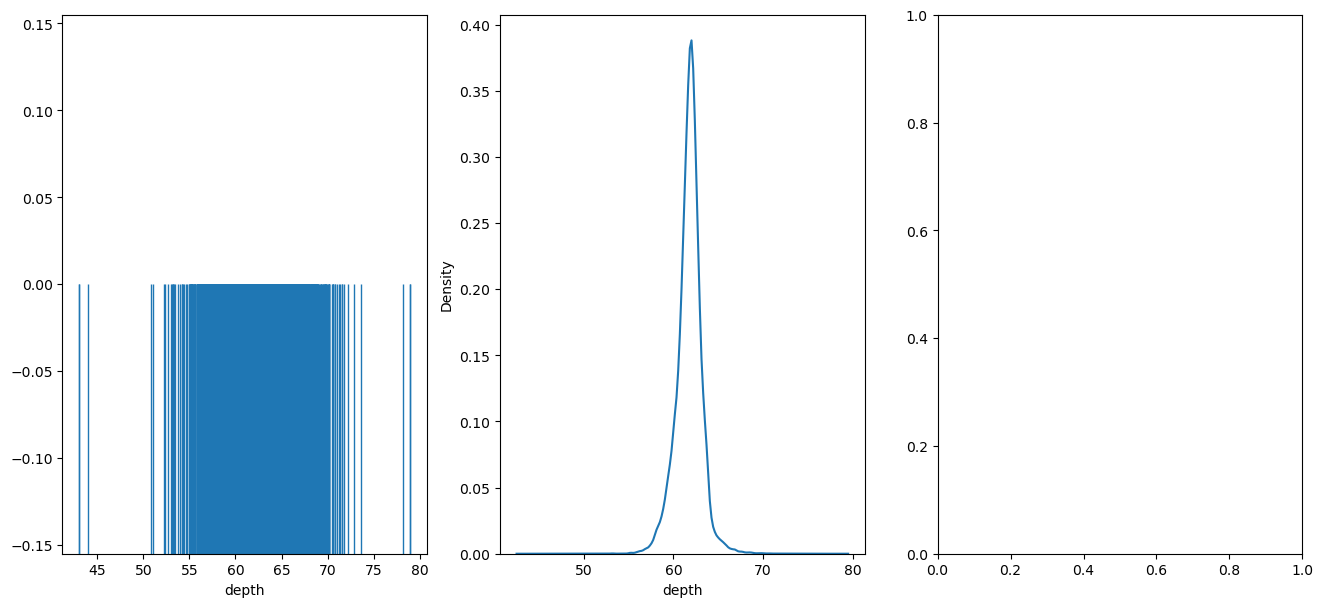

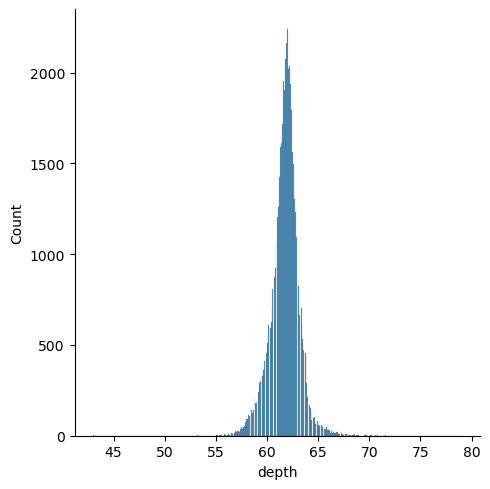

In [14]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="depth", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="depth")
sns.displot(ax = axes[2], data=df, x="depth")

E:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


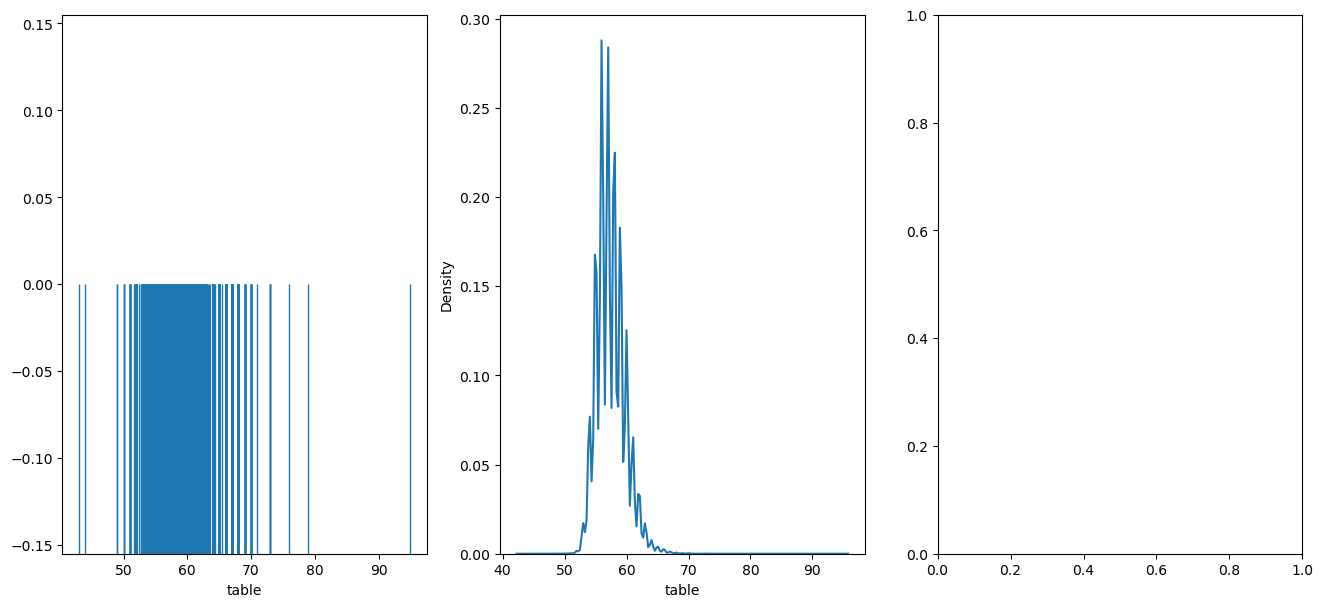

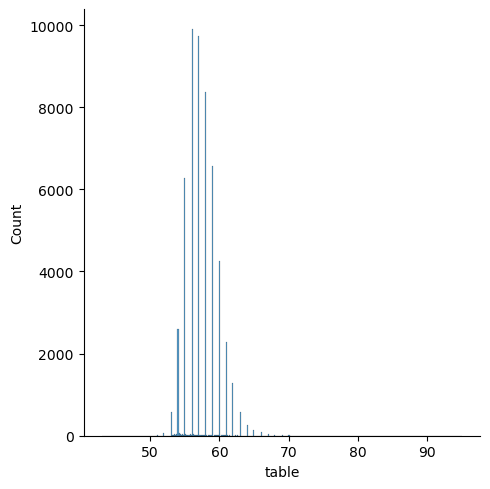

In [15]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="table", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="table")
sns.displot(ax = axes[2], data=df, x="table")

E:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


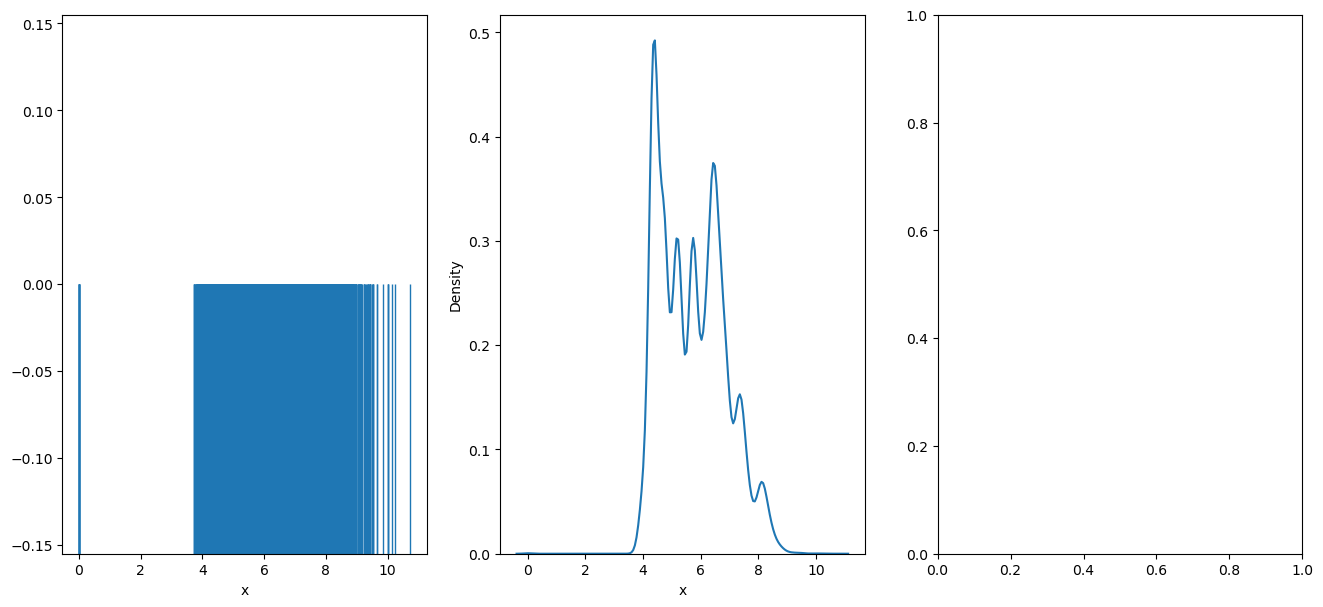

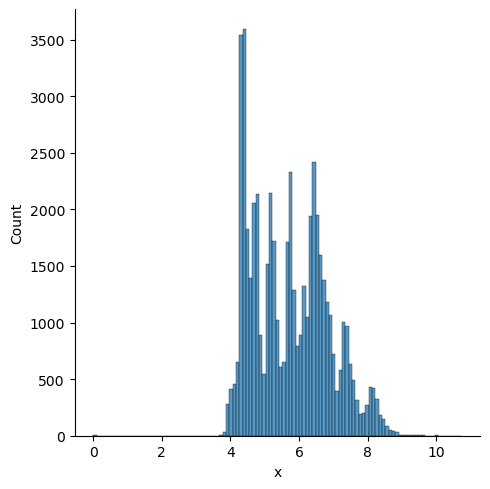

In [16]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="x", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="x")
sns.displot(ax = axes[2], data=df, x="x")

E:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


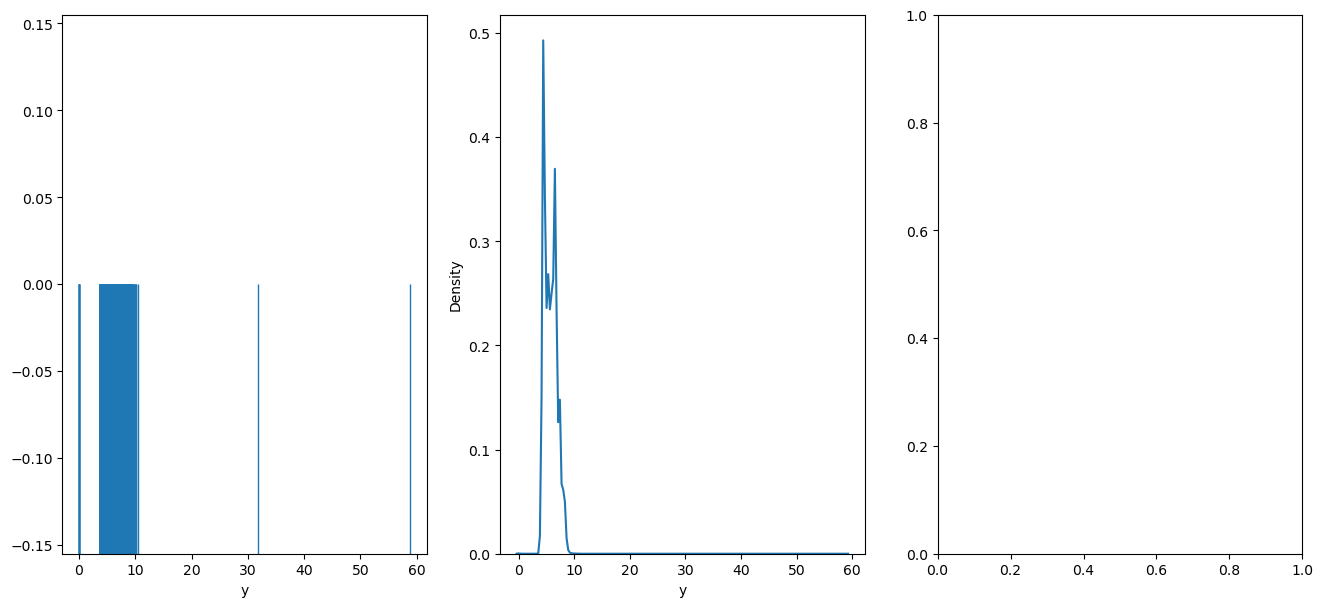

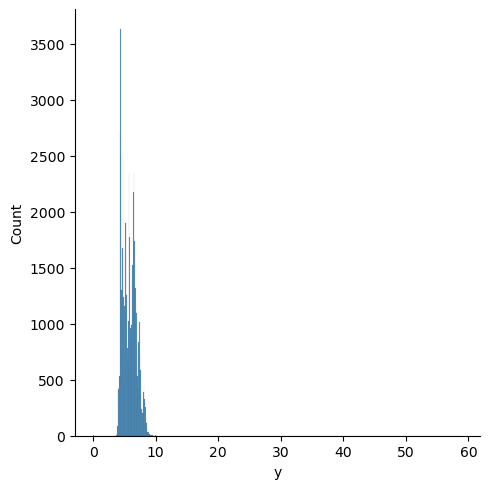

In [17]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="y", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="y")
sns.displot(ax = axes[2], data=df, x="y")

In [18]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="z", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="z")
sns.displot(ax = axes[2], data=df, x="z")

E:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='z'>

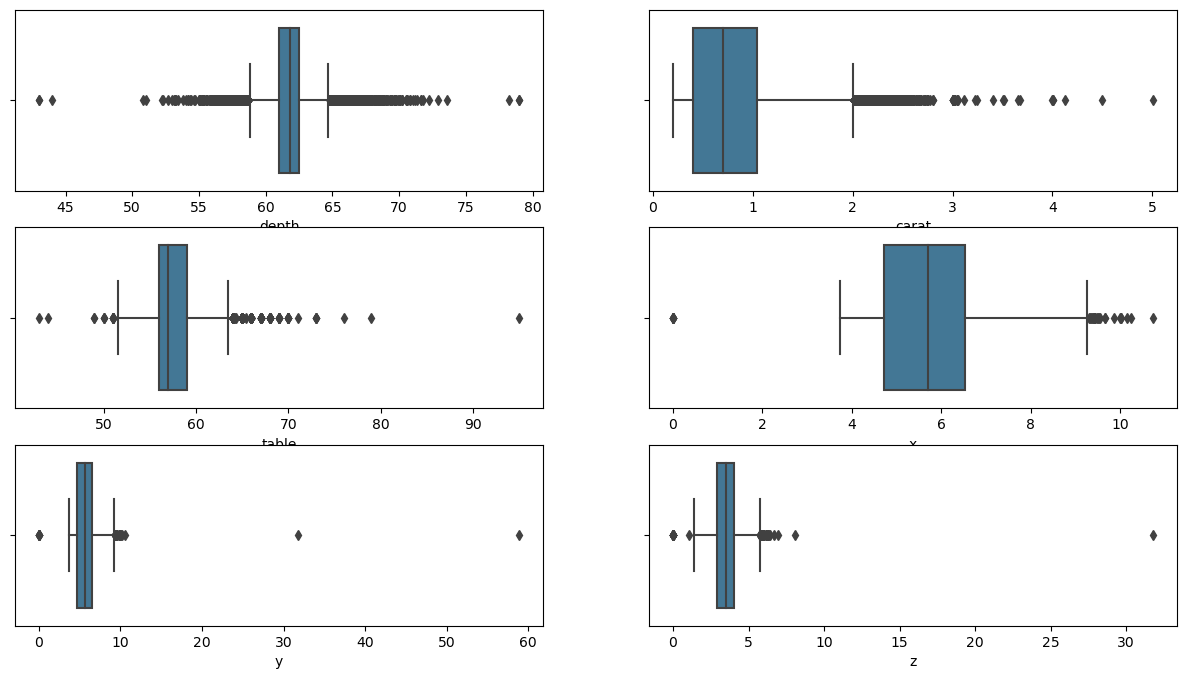

In [19]:
#Analysis of the numerical features 
fig=plt.figure(figsize=(15,8))
ax=[None for _ in range(6)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
ax[4]=plt.subplot2grid((3,2),(2,0))
ax[5]=plt.subplot2grid((3,2),(2,1))

sns.boxplot(x='depth',data=df,palette='mako',ax=ax[0])
sns.boxplot(x='carat',data=df,palette='mako',ax=ax[1])
sns.boxplot(x='table',data=df,palette='mako',ax=ax[2])
sns.boxplot(x='x',data=df,palette='mako',ax=ax[3])
sns.boxplot(x='y',data=df,palette='mako',ax=ax[4])
sns.boxplot(x='z',data=df,palette='mako',ax=ax[5])

C:\Users\Dear User\AppData\Local\Temp\ipykernel_3748\2118616650.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='depth',y='price', data=df,palette='mako',ax=ax[0])
C:\Users\Dear User\AppData\Local\Temp\ipykernel_3748\2118616650.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='carat',y='price',data=df,palette='mako',ax=ax[1])
C:\Users\Dear User\AppData\Local\Temp\ipykernel_3748\2118616650.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='table',y='price',data=df,palette='mako',ax=ax[2])
C:\Users\Dear User\AppData\Local\Temp\ipykernel_3748\2118616650.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x',y='price',data=df,palette='mako',ax=ax[3])
C:\Users\Dear User\AppData\Local\Temp\ipykernel_3748\2118616650.py:15: UserWarning: Ignoring `palette` because no `hue` variabl

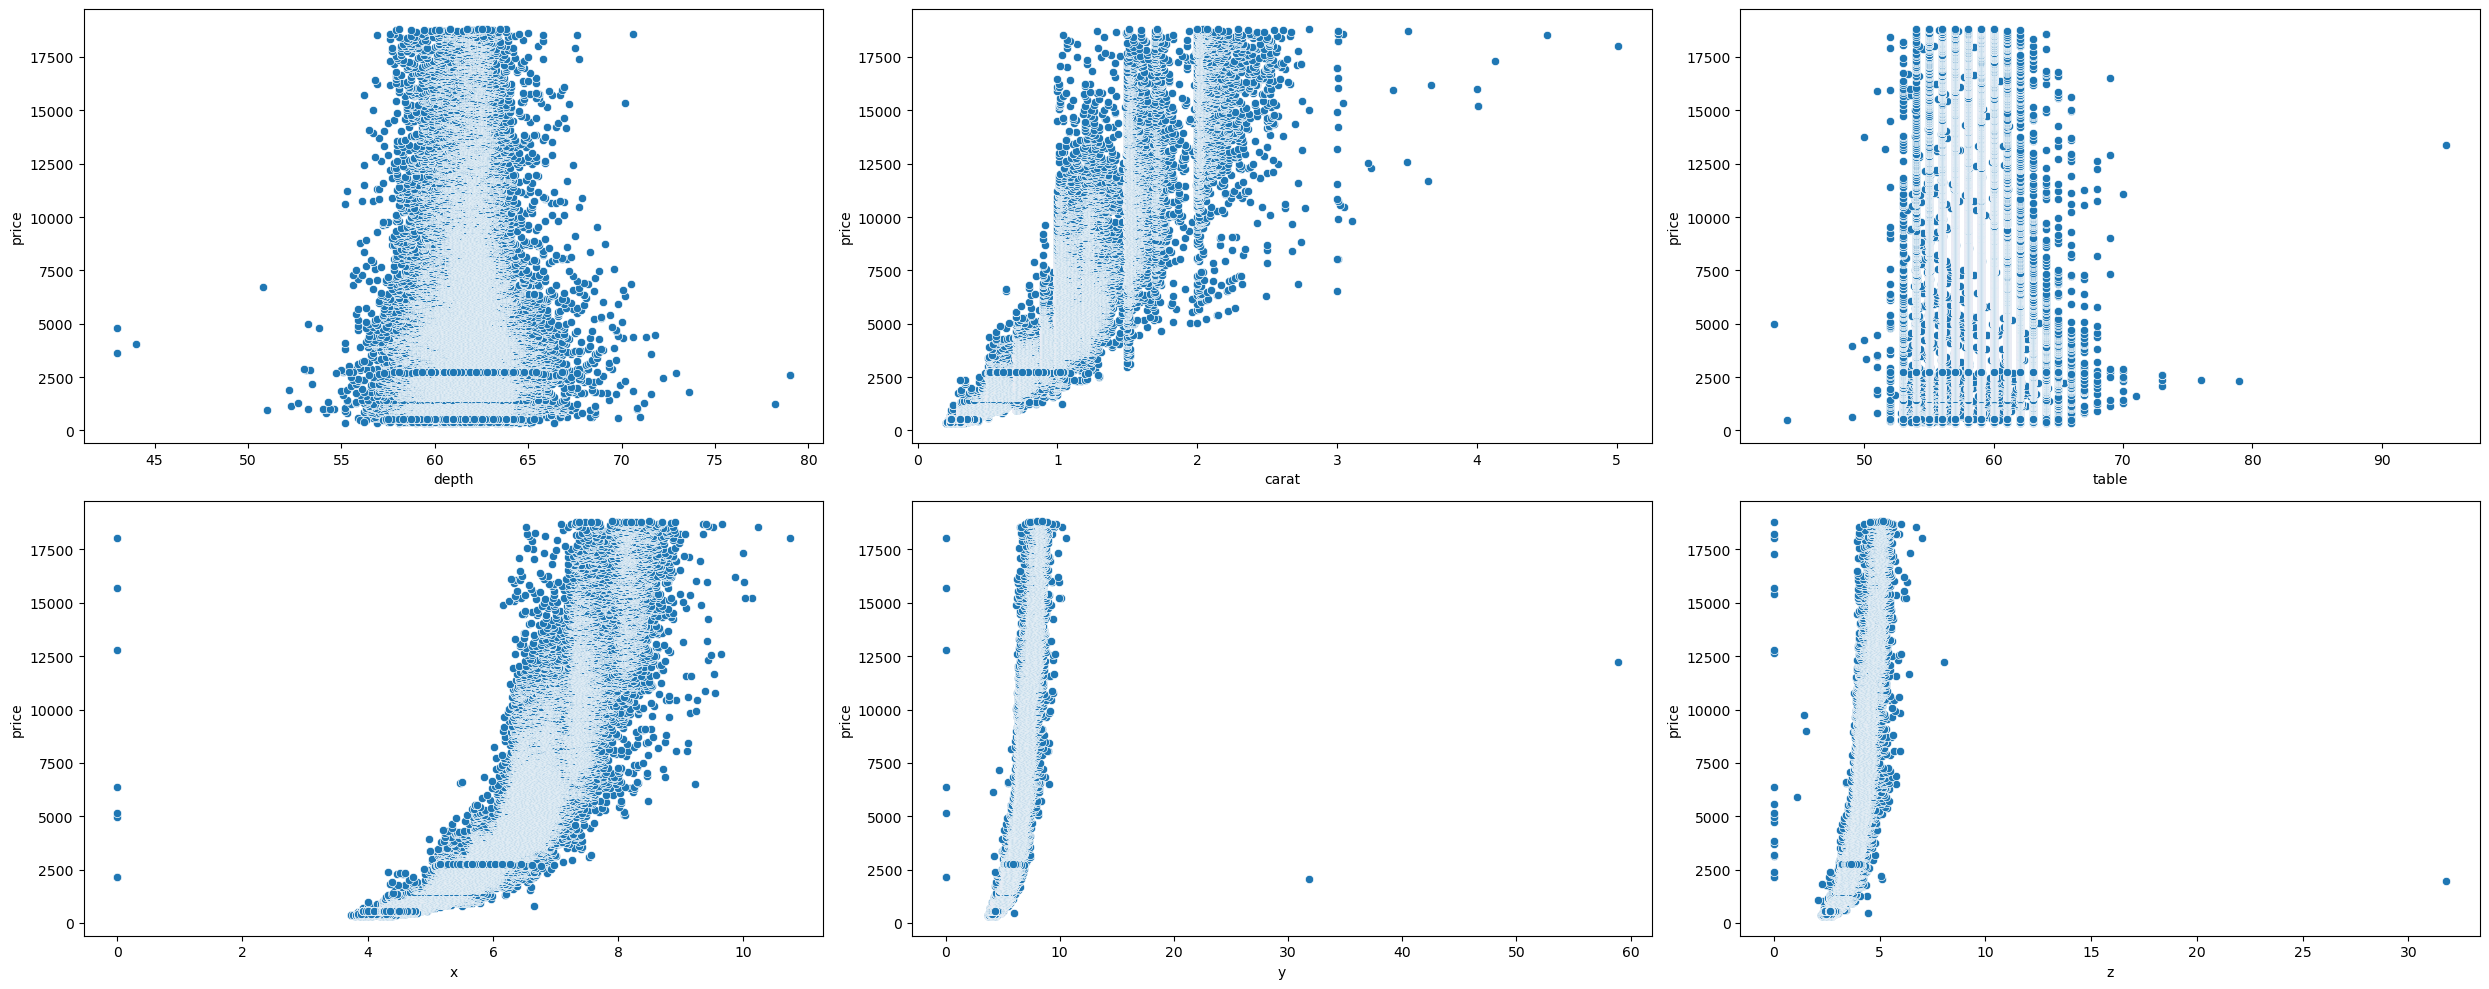

In [20]:
#Analysis of the numerical features 
fig=plt.figure(figsize=(25,10))
ax=[None for _ in range(6)]
ax[0]=plt.subplot2grid((2,3),(0,0))
ax[1]=plt.subplot2grid((2,3),(0,1))
ax[2]=plt.subplot2grid((2,3),(0,2))
ax[3]=plt.subplot2grid((2,3),(1,0))
ax[4]=plt.subplot2grid((2,3),(1,1))
ax[5]=plt.subplot2grid((2,3),(1,2))

sns.scatterplot(x='depth',y='price', data=df,palette='mako',ax=ax[0])
sns.scatterplot(x='carat',y='price',data=df,palette='mako',ax=ax[1])
sns.scatterplot(x='table',y='price',data=df,palette='mako',ax=ax[2])
sns.scatterplot(x='x',y='price',data=df,palette='mako',ax=ax[3])
sns.scatterplot(x='y',y='price',data=df,palette='mako',ax=ax[4])
sns.scatterplot(x='z',y='price',data=df,palette='mako',ax=ax[5])
plt.tight_layout()

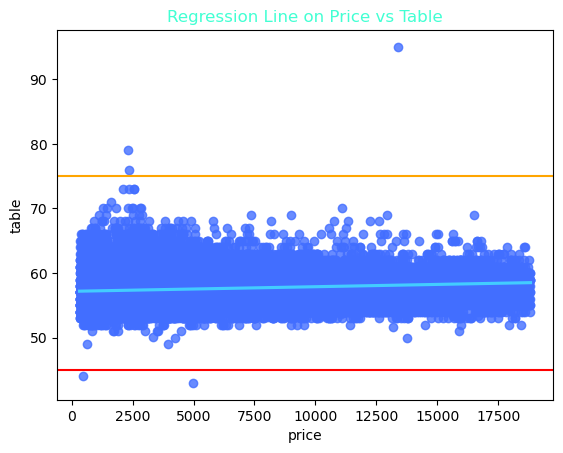

In [43]:
ax=sns.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "#426eff"}, line_kws={"color": "#42ccff"})
ax.set_title("Regression Line on Price vs Table", color="#42ffd3")
plt.axhline(y=45,color="red")
plt.axhline(y=75,color="orange")

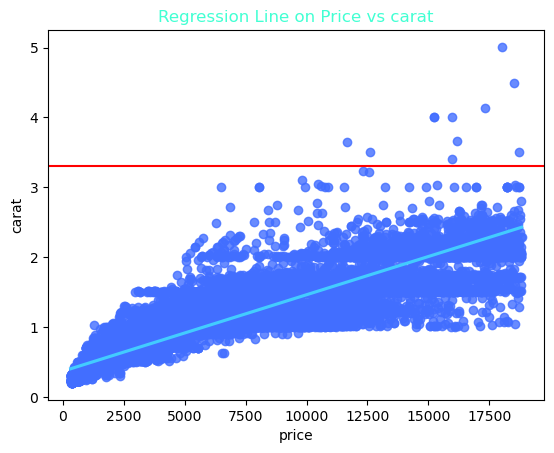

In [47]:
ax=sns.regplot(x="price", y="carat", data=df, fit_reg=True, scatter_kws={"color": "#426eff"}, line_kws={"color": "#42ccff"})
ax.set_title("Regression Line on Price vs carat", color="#42ffd3")
plt.axhline(y=3.3,color="red")

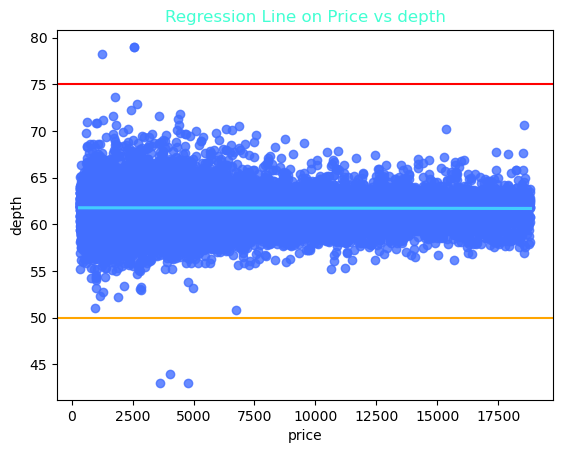

In [48]:
ax=sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#426eff"}, line_kws={"color": "#42ccff"})
ax.set_title("Regression Line on Price vs depth", color="#42ffd3")
plt.axhline(y=75,color="red")
plt.axhline(y=50,color="orange")

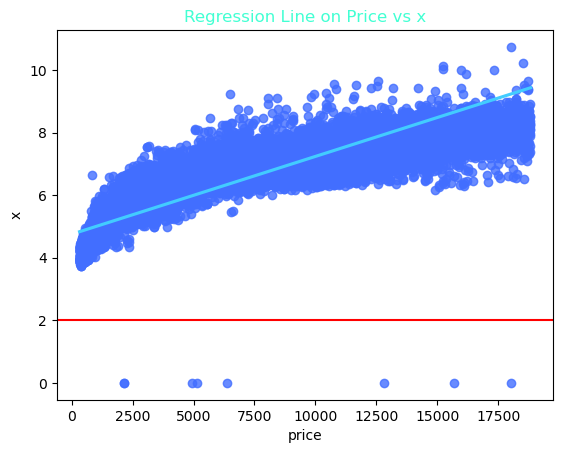

In [49]:
ax=sns.regplot(x="price", y="x", data=df, fit_reg=True, scatter_kws={"color": "#426eff"}, line_kws={"color": "#42ccff"})
ax.set_title("Regression Line on Price vs x", color="#42ffd3")
plt.axhline(y=2,color="red")

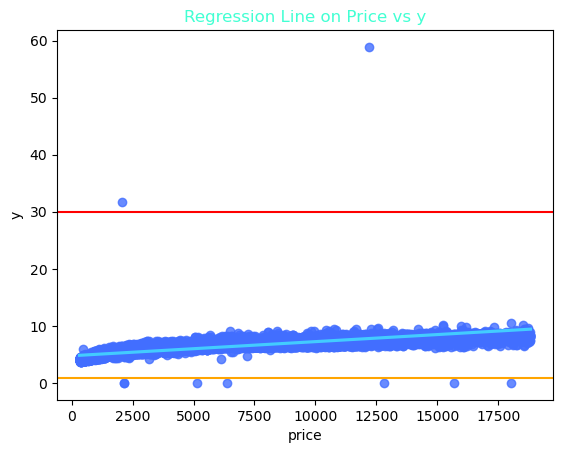

In [60]:
ax=sns.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "#426eff"}, line_kws={"color": "#42ccff"})
ax.set_title("Regression Line on Price vs y", color="#42ffd3")
plt.axhline(y=30,color="red")
plt.axhline(y=0.8,color="orange")

In [59]:
ax=sns.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "#426eff"}, line_kws={"color": "#42ccff"})
ax.set_title("Regression Line on Price vs z", color="#42ffd3")
plt.axhline(y=7,color="red")
plt.axhline(y=0.75,color="orange")

In [61]:
# Removing the datapoints having min 0 value in either x, y or z features 
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [62]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>50)]
df = df[(df["table"]<75)&(df["table"]>45)]
df = df[(df["carat"]<3.3)]
df = df[(df["x"]>2)]
df = df[(df["y"]<30)&(df["table"]>0.8)]
df = df[(df["z"]<7)&(df["z"]>0.75)]
df.shape

(53895, 10)

In [65]:
#Let's have a look at data 
shade = ["#426eff", "#baa0a0", "#42ccff", "#42ffd3", "#65634a"]#shades for hue
ax = sns.pairplot(df, hue= "cut",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count.

In [66]:
# Get list of categorical variables
samples = (df.dtypes =="object")
object_cols = list(samples[samples].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Text(0.5, 0, 'Cut')

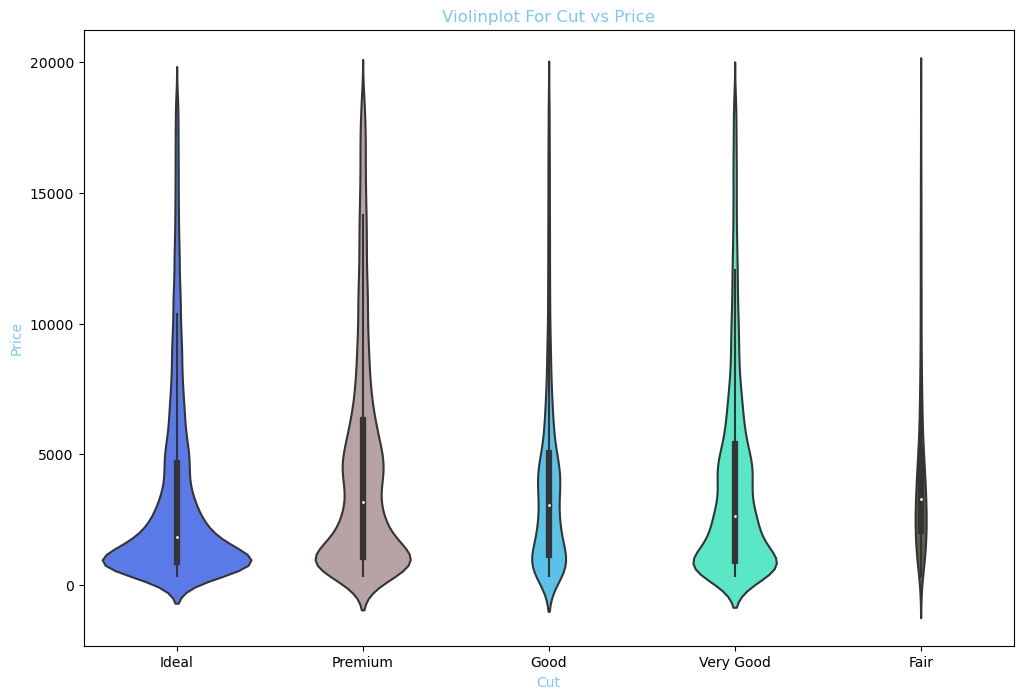

In [68]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=df, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#7bc8f6")
ax.set_ylabel("Price", color="#7bc8f6")
ax.set_xlabel("Cut", color="#7bc8f6")

Text(0.5, 0, 'color')

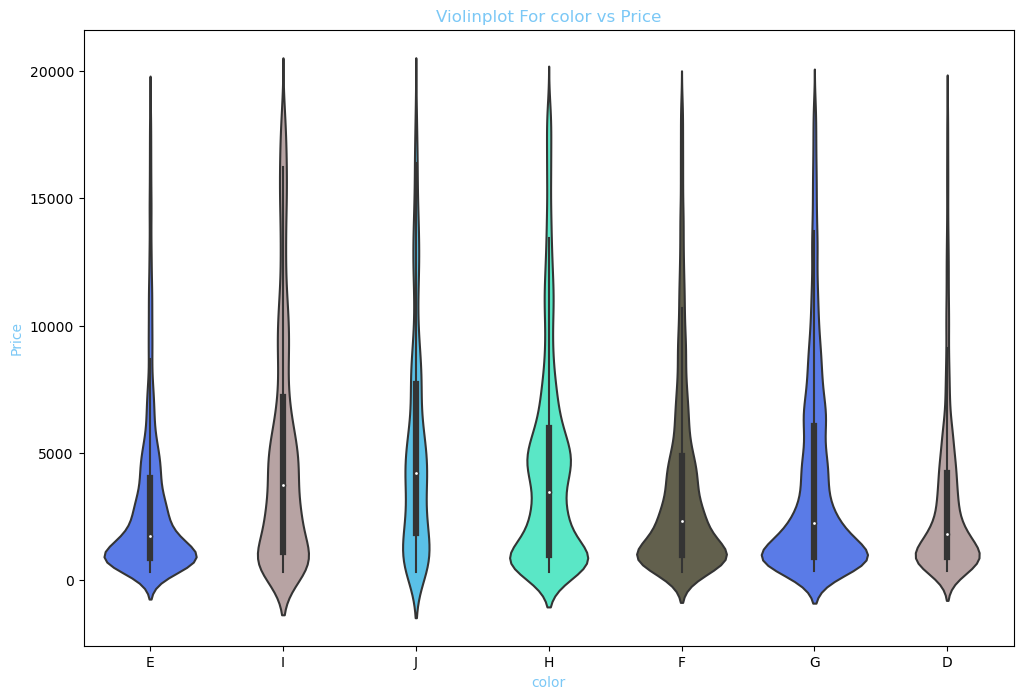

In [69]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=df, palette=shade,scale= "count")
ax.set_title("Violinplot For color vs Price", color="#7bc8f6")
ax.set_ylabel("Price", color="#7bc8f6")
ax.set_xlabel("color", color="#7bc8f6")

Text(0.5, 0, 'clarity')

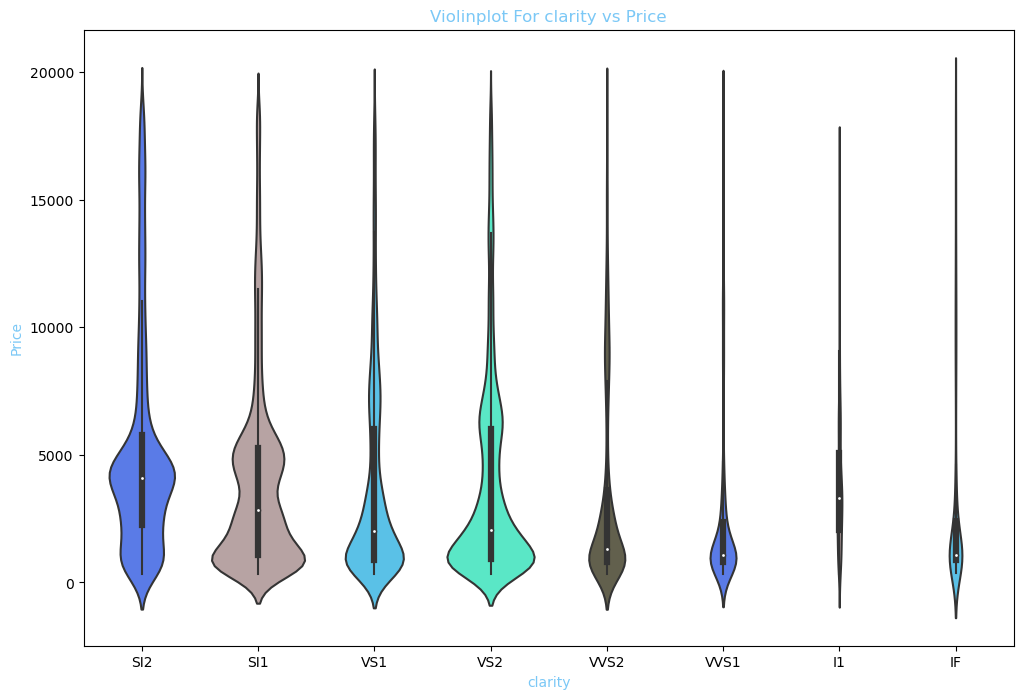

In [70]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade,scale= "count")
ax.set_title("Violinplot For clarity vs Price", color="#7bc8f6")
ax.set_ylabel("Price", color="#7bc8f6")
ax.set_xlabel("clarity", color="#7bc8f6")

In [74]:
# Make copy to avoid changing original data 
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
Unnamed: 0                                                                   
1            0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
2            0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
3            0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
4            0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
5            0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [77]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=101)

In [81]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


#pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     #("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn] #pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors"} #4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [82]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1315.665383 
DecisionTree: -747.557113 
RandomForest: -544.711321 
KNeighbors: -816.474232 


In [83]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test)

In [84]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9802945530367801
Adjusted R^2: 0.9802780845603507
MAE: 269.4164948157573
MSE: 313389.31551735714
RMSE: 559.8118572496988
